In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alsaniipe/differentiated-thyroid-cancer-recurrence-dataset

Dataset URL: https://www.kaggle.com/datasets/alsaniipe/differentiated-thyroid-cancer-recurrence-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.03k [00:00<?, ?B/s]
100% 3.03k/3.03k [00:00<00:00, 5.40MB/s]


In [ ]:
import zipfile

zipref = zipfile.ZipFile('/content/differentiated-thyroid-cancer-recurrence-dataset.zip', mode = 'r')
zipref.extractall()
zipref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Thyroid_Diff.csv')

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df_numerical = pd.get_dummies(df).astype(int)

In [ ]:
df_numerical

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_No,Recurred_Yes
0,27,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,30,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,62,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,62,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,1,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
379,81,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
380,72,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
381,61,0,1,0,1,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1


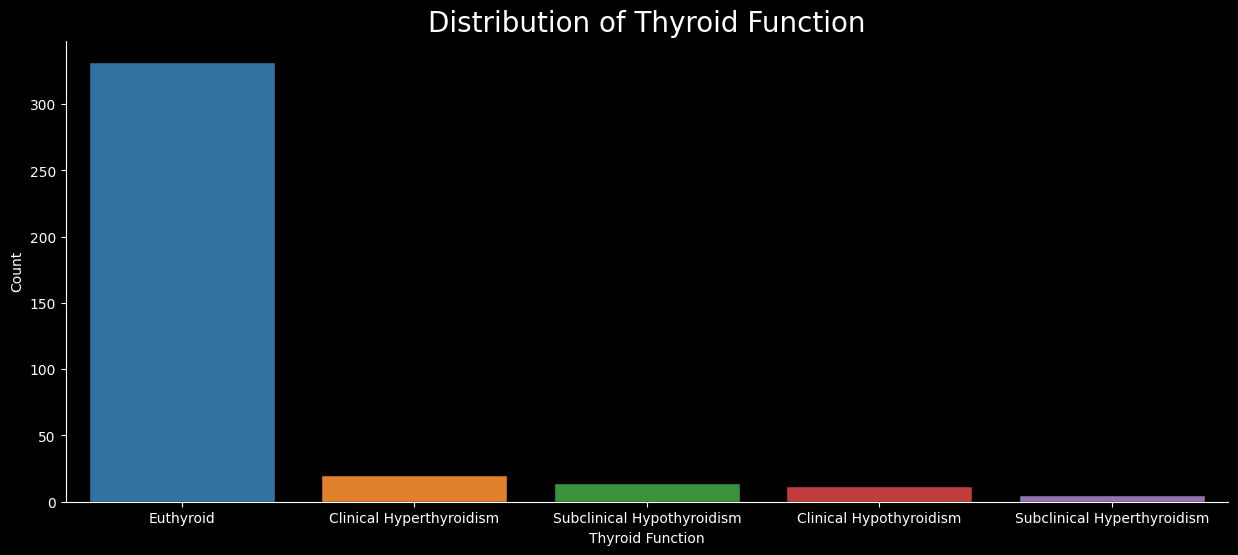

In [ ]:
plt.figure(figsize = (15, 6), facecolor = 'black')
thyroid_count = df['Thyroid Function'].value_counts()
barplot = sns.barplot(y = thyroid_count.values, x = thyroid_count.index, hue = thyroid_count.index, legend = False, edgecolor = 'black')
barplot.set_facecolor('black')
barplot.set_title('Distribution of Thyroid Function', color = 'white', fontsize = 20)
barplot.set_ylabel('Count', color = 'white')
barplot.set_xlabel('Thyroid Function', color = 'white')
barplot.spines['bottom'].set_color('white')
barplot.spines['left'].set_color('white')
barplot.tick_params(colors='white')

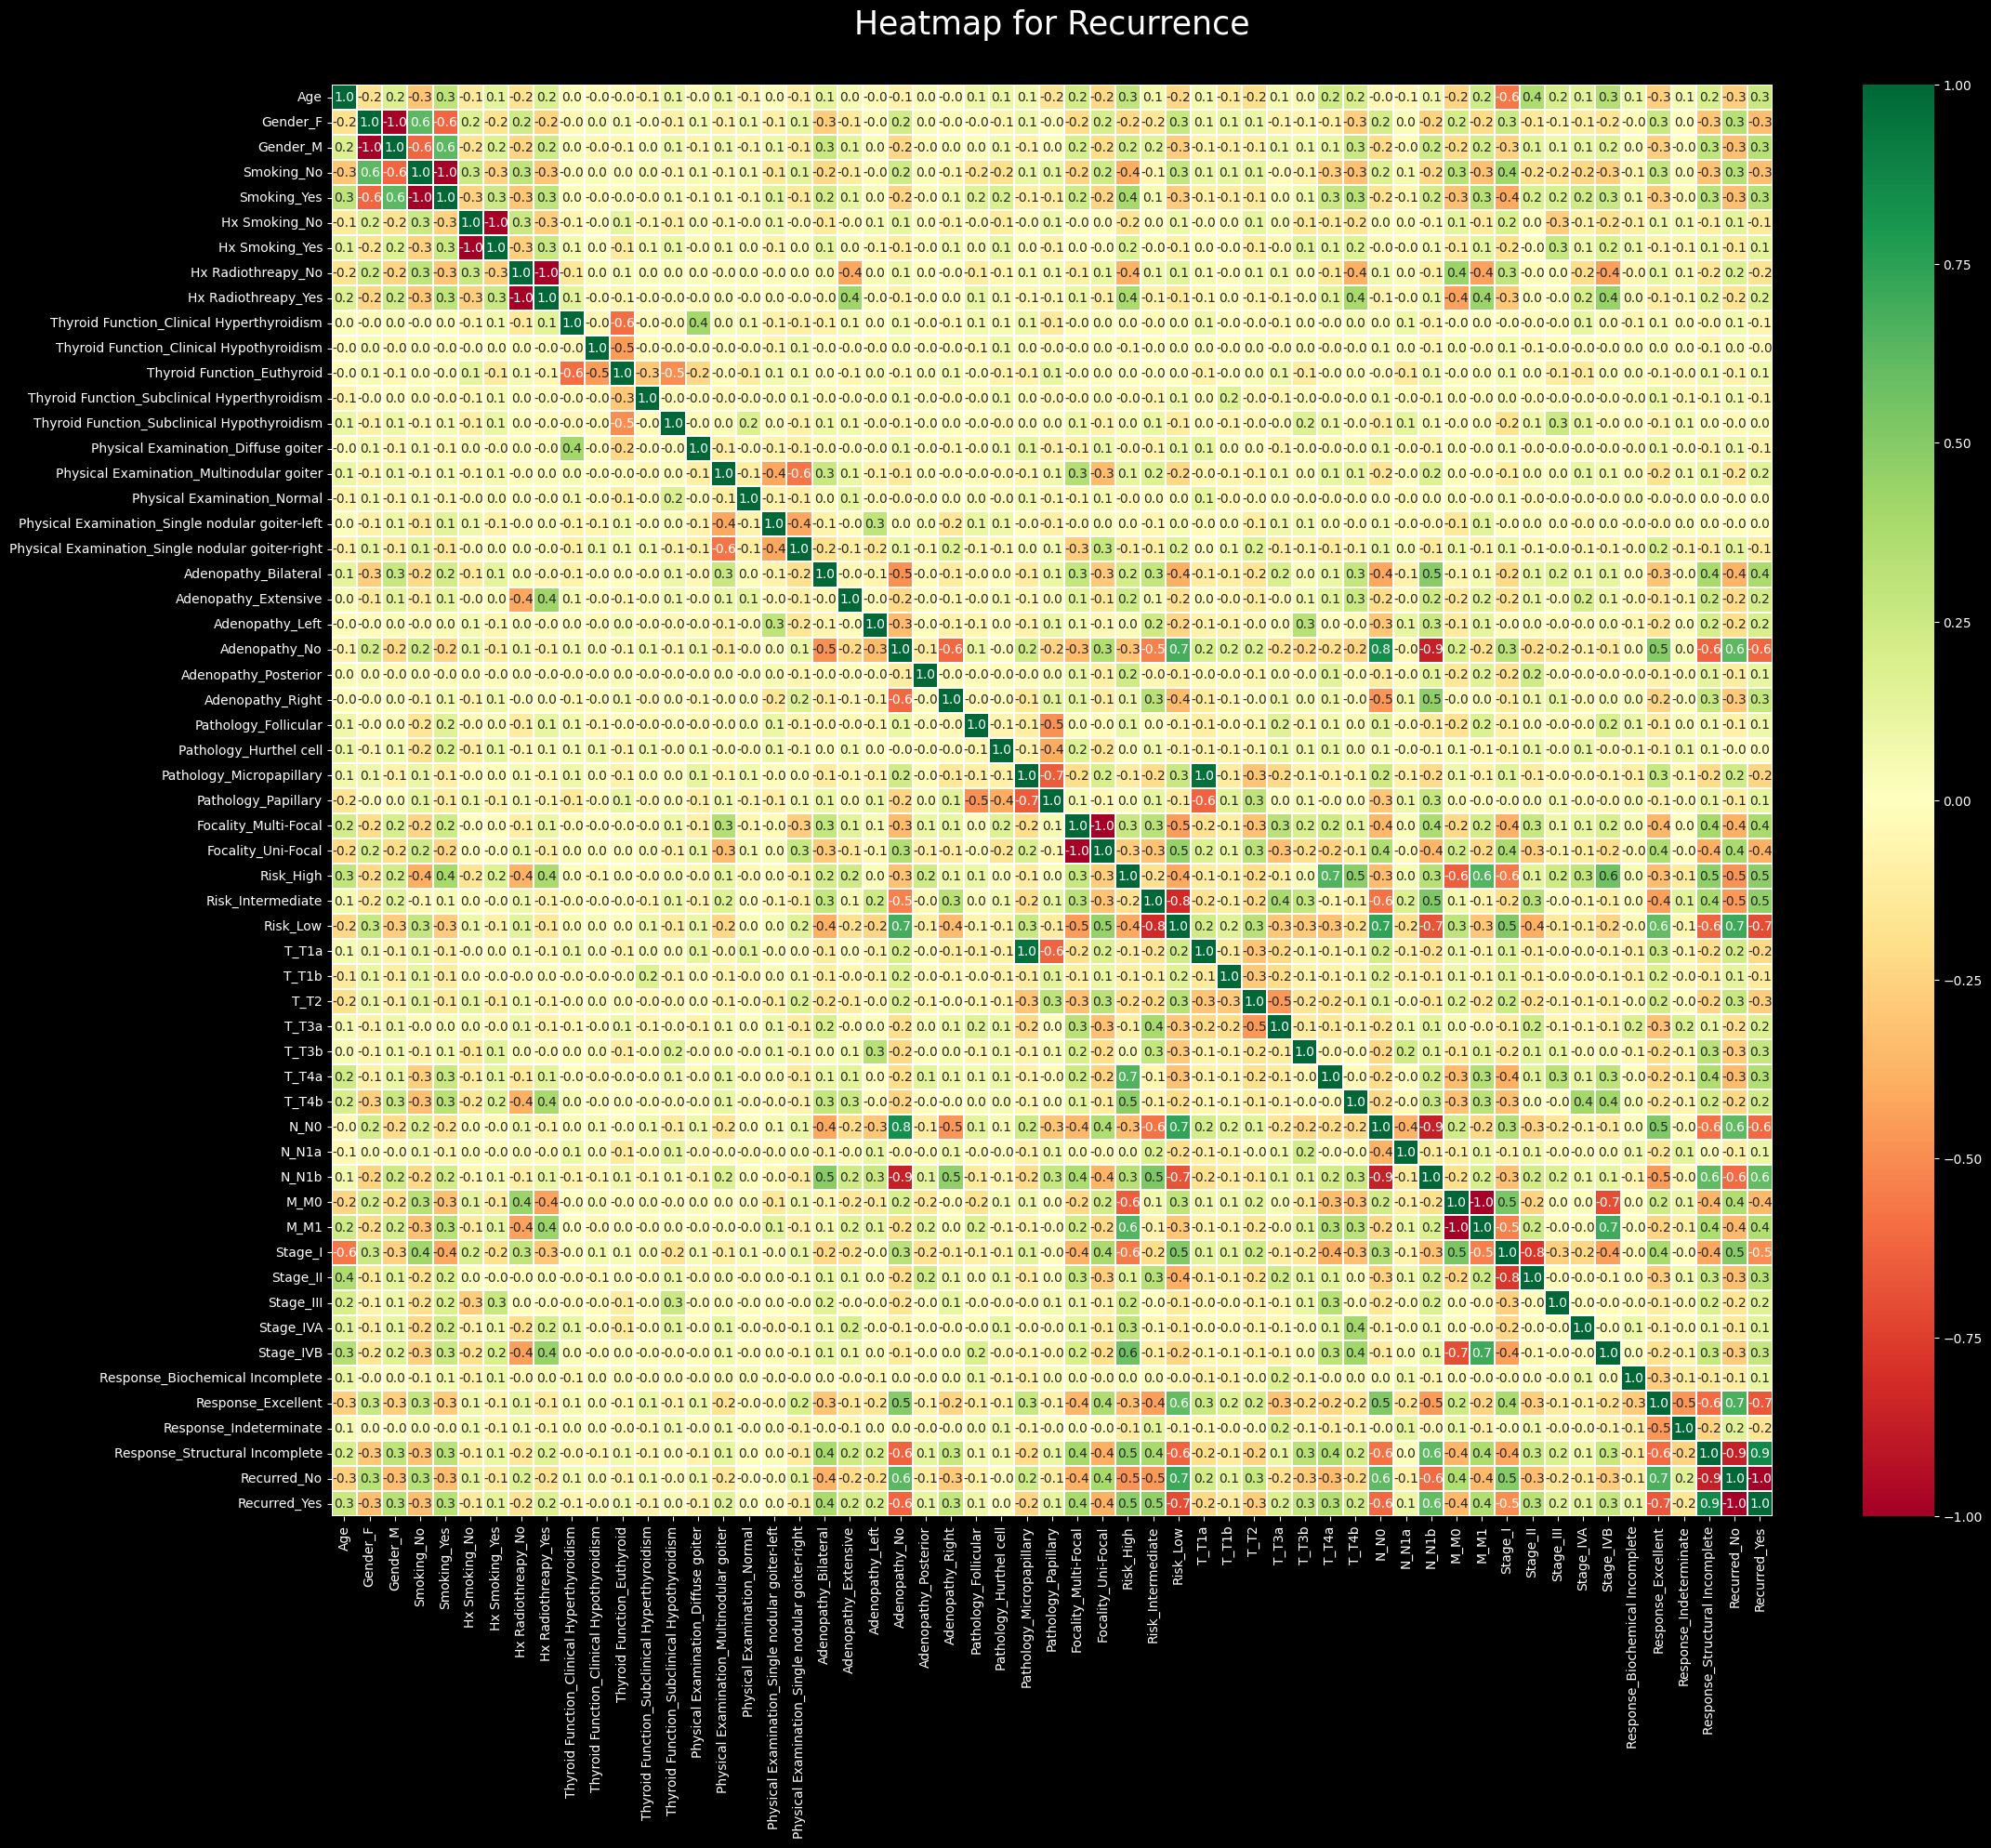

In [ ]:
corr_mat = df_numerical.corr()
plt.figure(figsize = (25, 20), facecolor = 'black')
heatmap = sns.heatmap(corr_mat, annot = True, fmt = '.1f', cmap='RdYlGn', linewidths = 0.1, robust = False)
heatmap.set_title('Heatmap for Recurrence', color = 'white', fontsize = 25, y = 1.03)
heatmap.tick_params(colors='white')
heatmap.figure.axes[-1].tick_params(axis='y', colors='white')

In [ ]:
target_col = corr_mat.loc[['Recurred_Yes', 'Recurred_No']]
transposed_target = target_col.T
columns_needed = []

for index, (value_1, value_2) in zip(transposed_target.index, zip(transposed_target['Recurred_Yes'],
                                                                  transposed_target['Recurred_No'])):
  if round(value_1, 1) != round(value_2, 1) and (round(value_1, 1) > 0.2 or round(value_1, 1) < -0.2) and (round(value_2, 1) > 0.2 or round(value_2, 1) < -0.2) :
    if index not in ['Recurred_Yes', 'Recurred_No']:
     columns_needed.append(index)

for i in columns_needed:
  print(i)

Age
Gender_F
Gender_M
Smoking_No
Smoking_Yes
Adenopathy_Bilateral
Adenopathy_No
Adenopathy_Right
Focality_Multi-Focal
Focality_Uni-Focal
Risk_High
Risk_Intermediate
Risk_Low
T_T2
T_T3b
T_T4a
N_N0
N_N1b
M_M0
M_M1
Stage_I
Stage_II
Stage_IVB
Response_Excellent
Response_Structural Incomplete


In [ ]:
len(columns_needed)

25

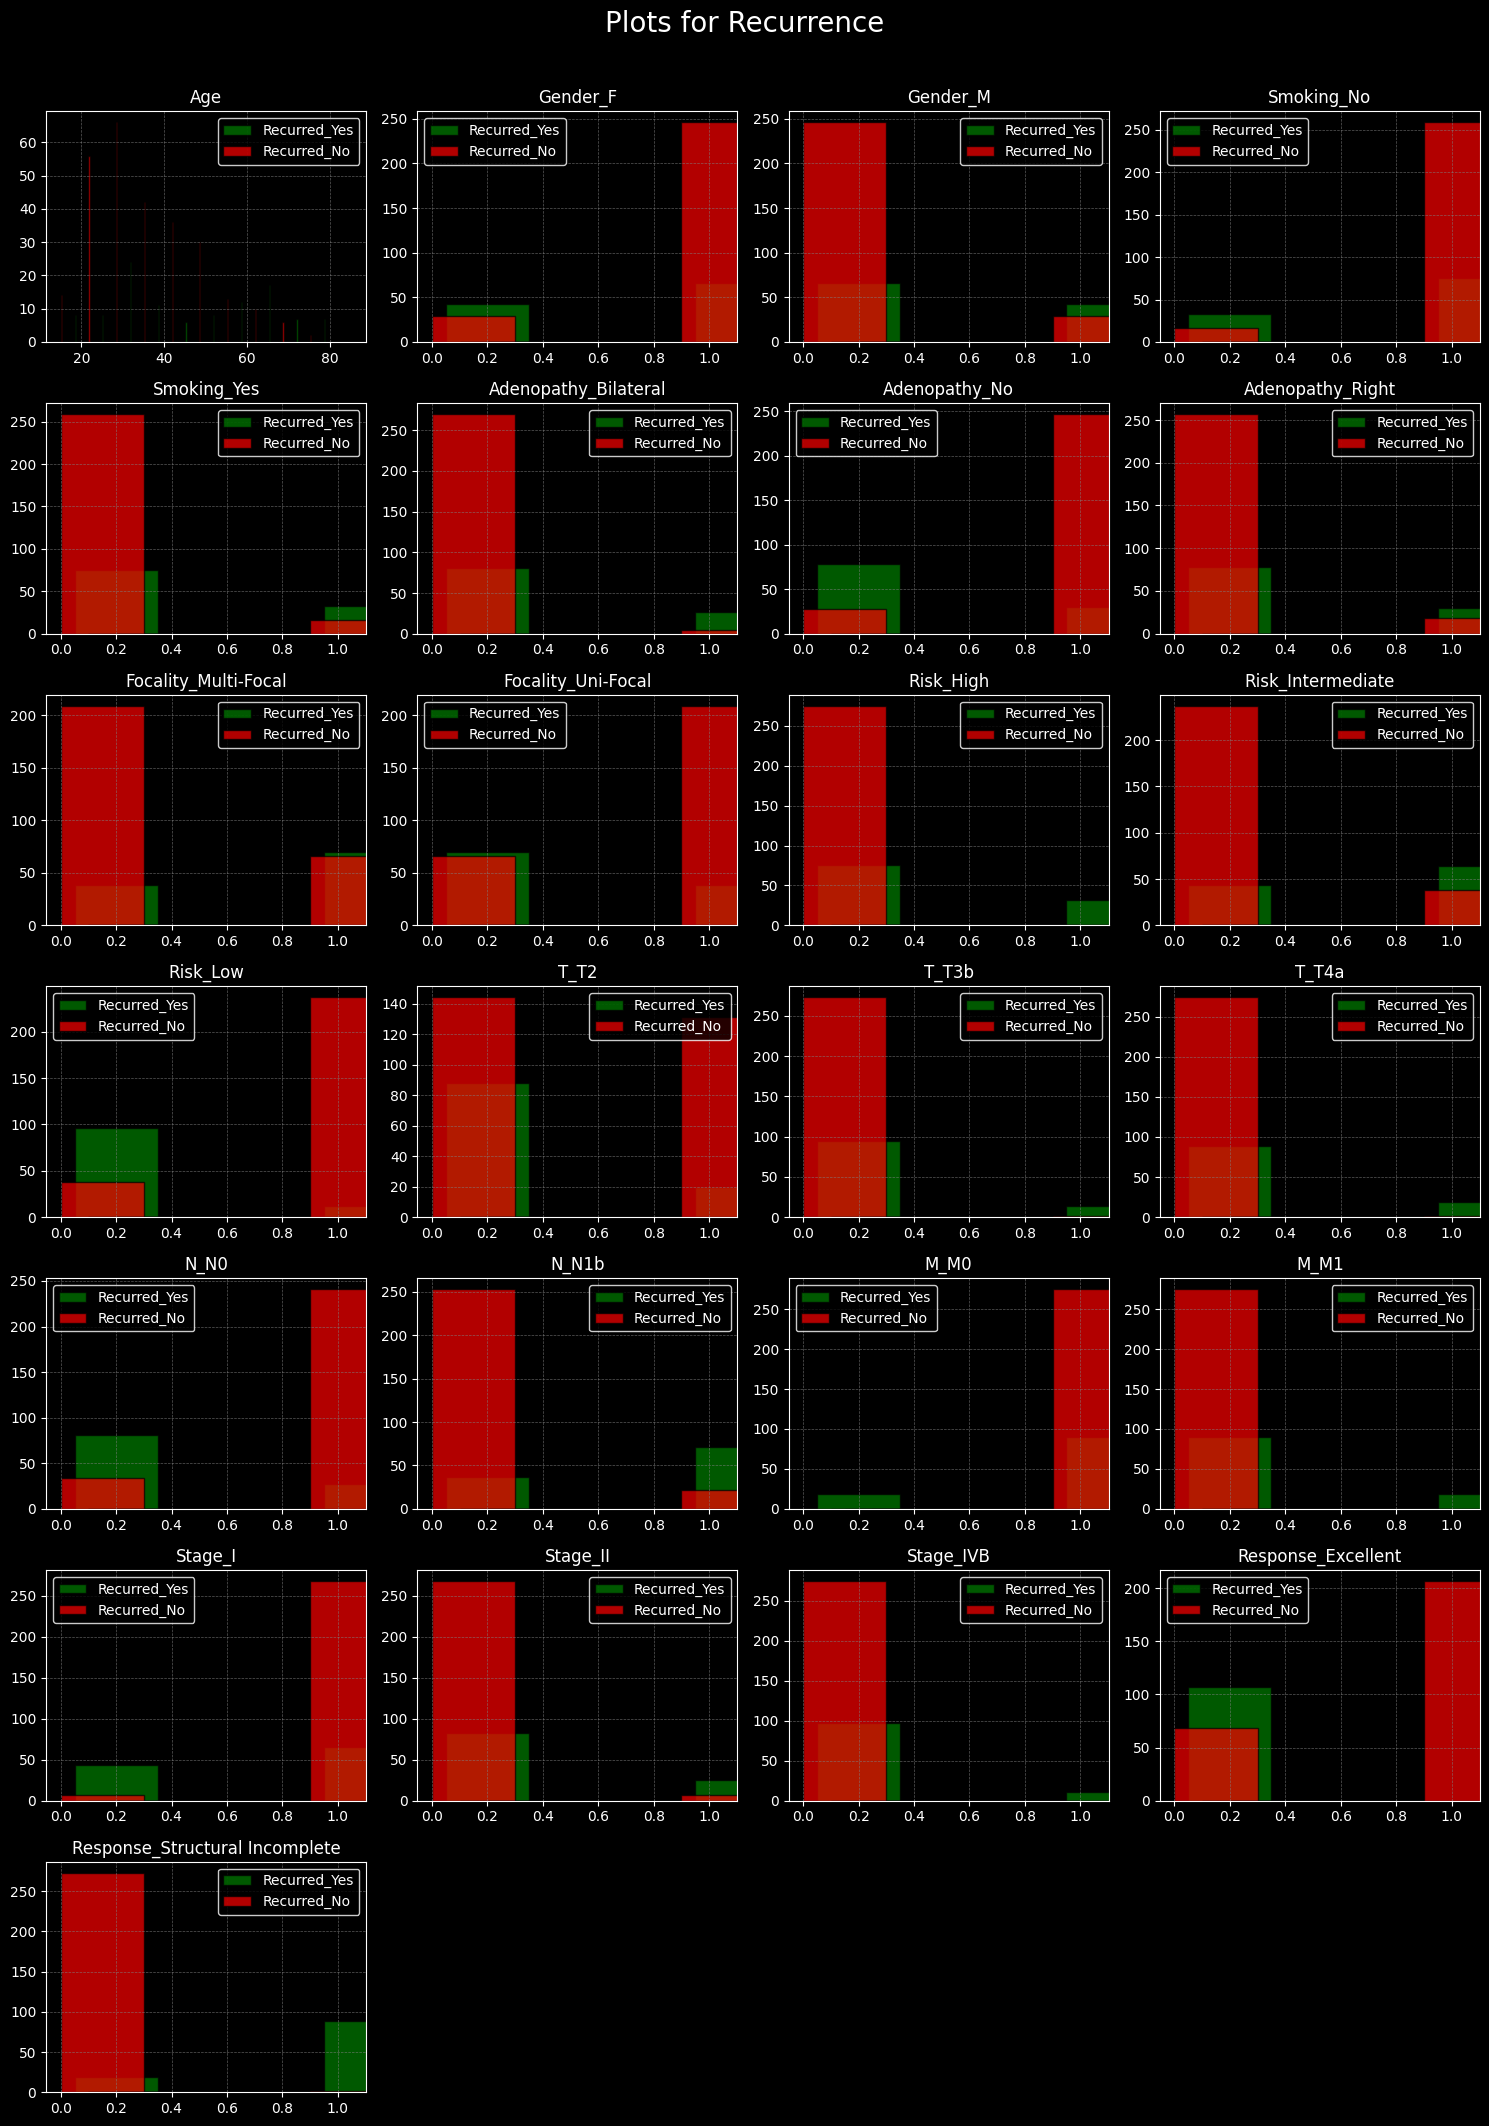

In [ ]:
n_cols = 4
n_rows = (len(columns_needed) + n_cols - 1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 3))
fig.set_facecolor('black')
fig.suptitle('Plots for Recurrence', color = 'white', fontsize = 20, y = 1.01)
bar_width = 0.3
for i, col in enumerate(columns_needed):
  color_yes = 'green'
  color_no = 'red'
  data_yes = df_numerical[df_numerical['Recurred_Yes'] == 1][col]
  data_no = df_numerical[df_numerical['Recurred_No'] == 1][col]
  combined_data = pd.concat([data_yes, data_no])
  bins = np.histogram_bin_edges(combined_data, bins=10)
  ax[i // n_cols, i % n_cols].set_facecolor('black')
  ax[i // n_cols, i % n_cols].hist(data_yes, bins=bins, alpha=0.7, edgecolor='black', color=color_yes, label='Recurred_Yes', width = bar_width, align='right')
  ax[i // n_cols, i % n_cols].hist(data_no, bins=bins, alpha=0.7, edgecolor='black', color=color_no, label='Recurred_No', width = bar_width, align='mid')
  ax[i // n_cols, i % n_cols].set_title(col, color = 'white')
  ax[i // n_cols, i % n_cols].tick_params(axis='x', colors='white')
  ax[i // n_cols, i % n_cols].tick_params(axis='y', colors='white')
  ax[i // n_cols, i % n_cols].spines['bottom'].set_color('white')
  ax[i // n_cols, i % n_cols].spines['top'].set_color('white')
  ax[i // n_cols, i % n_cols].spines['right'].set_color('white')
  ax[i // n_cols, i % n_cols].spines['left'].set_color('white')
  ax[i // n_cols, i % n_cols].grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
  ax[i // n_cols, i % n_cols].legend(facecolor='black', edgecolor='white', labelcolor = 'white')

for j in range(len(columns_needed), n_rows * n_cols):
    fig.delaxes(ax.flatten()[j])

fig.tight_layout()
plt.show()

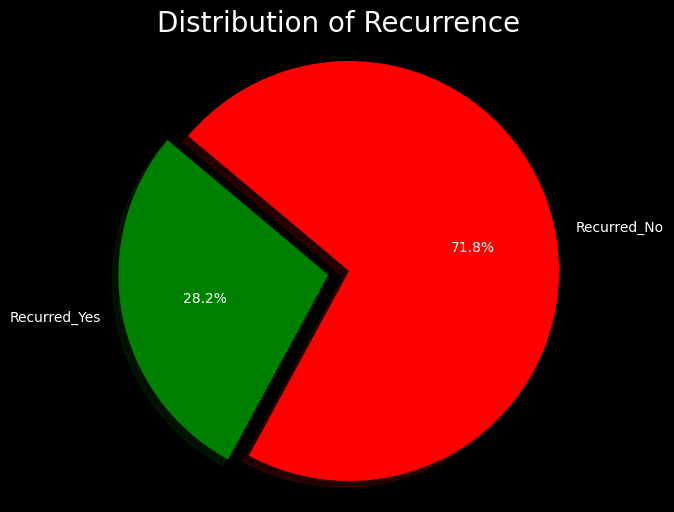

In [ ]:
yes_count = df_numerical['Recurred_Yes'].sum()
no_count = df_numerical['Recurred_No'].sum()

labels = ['Recurred_Yes', 'Recurred_No']
sizes = [yes_count, no_count]
color = ['green', 'red']
explode = (0.1, 0)

plt.figure(figsize=(8, 6), facecolor = 'black')
plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'color': 'white'})
plt.title('Distribution of Recurrence', color = 'white', fontsize = 20)
plt.axis('equal')

plt.show()

In [ ]:
df_numerical[columns_needed].isnull().sum()

Age                               0
Gender_F                          0
Gender_M                          0
Smoking_No                        0
Smoking_Yes                       0
Adenopathy_Bilateral              0
Adenopathy_No                     0
Adenopathy_Right                  0
Focality_Multi-Focal              0
Focality_Uni-Focal                0
Risk_High                         0
Risk_Intermediate                 0
Risk_Low                          0
T_T2                              0
T_T3b                             0
T_T4a                             0
N_N0                              0
N_N1b                             0
M_M0                              0
M_M1                              0
Stage_I                           0
Stage_II                          0
Stage_IVB                         0
Response_Excellent                0
Response_Structural Incomplete    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df_numerical[columns_needed]
y = df['Recurred'].replace({'Yes': 1, 'No': 0}).astype(int)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
train_X.shape, train_y.shape

((287, 25), (287,))

In [ ]:
test_X.shape, test_y.shape

((96, 25), (96,))

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=28)
train_X, train_y = smote.fit_resample(train_X, train_y)

In [44]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from keras_tuner import RandomSearch, Objective

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def f1_metric(y_true, y_pred):
  y_pred_binary = tf.round(y_pred)
  return tf.py_function(f1_score, (y_true, y_pred_binary), tf.double)

In [50]:
from tensorflow.keras.metrics import AUC
from kerastuner import Hyperband

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
        y_pred = tf.cast(tf.greater_equal(y_pred, 0.5), tf.float32)
        self.true_positives.assign_add(tf.reduce_sum(y_true * y_pred))
        self.false_positives.assign_add(tf.reduce_sum(y_pred * (1 - y_true)))
        self.false_negatives.assign_add(tf.reduce_sum((1 - y_pred) * y_true))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

class CombinedF1AUC(tf.keras.metrics.Metric):
    def __init__(self, name='combined_f1_auc', **kwargs):
        super(CombinedF1AUC, self).__init__(name=name, **kwargs)
        self.f1_metric = F1Score()
        self.auc_metric = AUC()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.f1_metric.update_state(y_true, y_pred, sample_weight)
        self.auc_metric.update_state(y_true, y_pred, sample_weight)

    def result(self):
        f1 = self.f1_metric.result()
        auc = self.auc_metric.result()
        return (f1 + auc) / 2.0

    def reset_states(self):
        self.f1_metric.reset_states()
        self.auc_metric.reset_states()

In [51]:
def build_model(hp):
  model = Sequential()
  hp_units = hp.Int(name='units', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units, activation='relu', input_dim=train_X.shape[1]))
  hp_dropout = hp.Float(name='dropout', min_value=0.0, max_value=0.5, step=0.1)
  model.add(Dropout(hp_dropout))
  hp_units_2 = hp.Int(name='units_2', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units_2, activation='relu'))
  hp_dropout_2 = hp.Float(name='dropout_2', min_value=0.1, max_value=1.0, step=0.1)
  model.add(Dropout(hp_dropout_2))
  model.add(Dense(1, activation='sigmoid'))

  hp_learning_rate = hp.Choice(name='learning_rate', values=[1e-1, 1e-2, 1e-3])
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss=BCE(),
                metrics=[CombinedF1AUC()])
  return model

In [52]:
tuner = Hyperband(
    build_model,
    objective=Objective("val_combined_f1_auc", direction="max"),
    max_epochs=50,
    hyperband_iterations=3,
    directory='my_dir',
    project_name='my_project'
)

Reloading Tuner from my_dir/my_project/tuner0.json


In [53]:
tuner.search_space_summary()

tuner.search(train_X, train_y, epochs=50, validation_data=(test_X, test_y))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is {best_hps.get('units')}, with Dropout rate of {best_hps.get('dropout')} with a learning rate of {best_hps.get('learning_rate')}.
""")

Trial 264 Complete [00h 00m 12s]
val_combined_f1_auc: 0.9647294282913208

Best val_combined_f1_auc So Far: 0.9722398519515991
Total elapsed time: 00h 22m 27s

The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is 480, with Dropout rate of 0.0 with a learning rate of 0.01.



In [28]:
from tensorflow.keras.callbacks import Callback

class EarlyStoppingF1(Callback):
  def __init__(self, patience=5):
    super(EarlyStoppingF1, self).__init__()
    self.patience = patience
    self.best_weights = None
    self.best_val_f1 = 0
    self.wait = 0

  def on_epoch_end(self, epoch, logs=None):
    current_val_f1 = logs.get("val_f1_metric")
    if current_val_f1 is None:
      return

    if np.greater(current_val_f1, self.best_val_f1):
      self.best_val_f1 = current_val_f1
      self.wait = 0
      self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if self.wait >= self.patience:
          self.model.stop_training = True
          self.model.set_weights(self.best_weights)
          print(f"\nRestoring model weights from the end of the best epoch: {epoch - self.wait}")

In [54]:
best_hps.values

{'units': 480,
 'dropout': 0.0,
 'units_2': 480,
 'dropout_2': 0.30000000000000004,
 'learning_rate': 0.01,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0242'}

In [63]:
optimized_model = tuner.hypermodel.build(best_hps)

In [64]:
optimized_model.compile(
    optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
    loss=BCE(),
    metrics=[CombinedF1AUC()]
)

In [65]:
early_stopping_f1 = EarlyStoppingF1(patience=20)

In [66]:
optimized_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 480)               12480     
                                                                 
 dropout_4 (Dropout)         (None, 480)               0         
                                                                 
 dense_7 (Dense)             (None, 480)               230880    
                                                                 
 dropout_5 (Dropout)         (None, 480)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 481       
                                                                 
Total params: 243841 (952.50 KB)
Trainable params: 243841 (952.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
history = optimized_model.fit(
    train_X, train_y,
    epochs=50,
    validation_data=(test_X, test_y),
    callbacks=[early_stopping_f1]
)

Epoch 1/50
10/13 [======================>.......] - ETA: 0s - loss: 4.0660 - combined_f1_auc: 0.5509

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric CombinedF1AUC implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


13/13 [==============================] - 2s 52ms/step - loss: 3.2858 - combined_f1_auc: 0.5491 - val_loss: 0.4506 - val_combined_f1_auc: 0.6246
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 0.3381 - combined_f1_auc: 0.8990 - val_loss: 0.2550 - val_combined_f1_auc: 0.8940
Epoch 3/50
13/13 [==============================] - 0s 10ms/step - loss: 0.3152 - combined_f1_auc: 0.9115 - val_loss: 0.1939 - val_combined_f1_auc: 0.9179
Epoch 4/50
13/13 [==============================] - 0s 10ms/step - loss: 0.1721 - combined_f1_auc: 0.9580 - val_loss: 0.1786 - val_combined_f1_auc: 0.9190
Epoch 5/50
13/13 [==============================] - 0s 12ms/step - loss: 0.1566 - combined_f1_auc: 0.9639 - val_loss: 0.1437 - val_combined_f1_auc: 0.9301
Epoch 6/50
13/13 [==============================] - 0s 12ms/step - loss: 0.1154 - combined_f1_auc: 0.9721 - val_loss: 0.1355 - val_combined_f1_auc: 0.9315
Epoch 7/50
13/13 [==============================] - 0s 10ms/step - loss: 0.1353 -

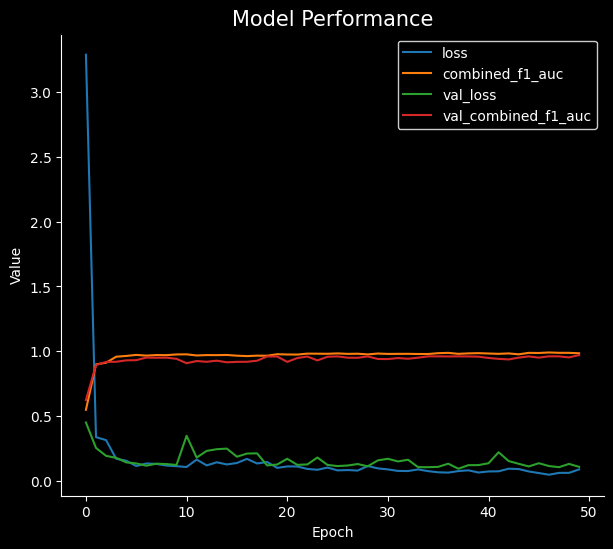

In [68]:
history_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(figsize=(7, 6), facecolor='black')
history_df.plot(ax=ax)
ax.set_facecolor('black')
ax.set_title('Model Performance', color='white', fontsize=15)
ax.set_xlabel('Epoch', color='white')
ax.set_ylabel('Value', color='white')
ax.tick_params(colors='white', which='both')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
legend = ax.legend(facecolor = 'black', edgecolor = 'white')
for text in legend.get_texts():
    text.set_color('white')
plt.show()

In [69]:
pred_y = optimized_model.predict(test_X)

3/3 [==============================] - 0s 6ms/step


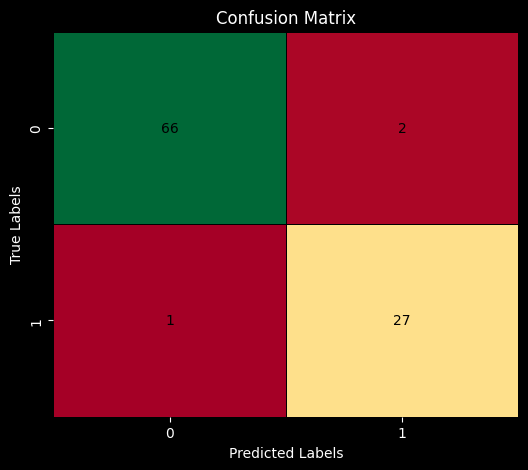

Accuracy: 0.9688
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.93      0.96      0.95        28

    accuracy                           0.97        96
   macro avg       0.96      0.97      0.96        96
weighted avg       0.97      0.97      0.97        96



In [70]:
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(test_y, pred_y.round())
confusion_mat = confusion_matrix(test_y, pred_y.round())
classification_report = classification_report(test_y, pred_y.round())

plt.figure(figsize=(6, 5), facecolor='black')
heatmap = sns.heatmap(confusion_mat, annot=True, cmap='RdYlGn', cbar=False, linewidths=0.5, linecolor='black', annot_kws={'color': 'black'})
heatmap.set_title('Confusion Matrix', color='white')
heatmap.set_xlabel('Predicted Labels', color='white')
heatmap.set_ylabel('True Labels', color='white')
heatmap.tick_params(colors='white')
heatmap.figure.axes[-1].tick_params(axis='y', colors='white')
plt.show()

print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report: \n{classification_report}')